#**Task 2: Predict Future Stock Prices (Short-Term)**

**Importing Libraries**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

**Data Loading**

In [2]:
symbol = 'AAPL'
data = yf.download(symbol, period='2y')
file_name = f"{symbol}_data.csv"
data.to_csv(file_name)
print(f"\nThe data is saved as {file_name}")

[*********************100%***********************]  1 of 1 completed


The data is saved as AAPL_data.csv


**Basic Data Exploration**

In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-11-27,188.014435,188.886207,187.132762,188.143223,40552600
2023-11-28,188.618713,189.292360,187.628069,188.004519,38415400
2023-11-29,187.598328,190.292882,187.202076,189.114012,43014200
2023-11-30,188.172913,188.539461,186.429384,188.063941,48794400
2023-12-01,189.450836,189.767835,187.459631,188.549346,45704800


In [4]:
print("Shape of dataset: ", data.shape)

Shape of dataset:  (503, 5)


In [5]:
print("Statistics Summary:")
data.describe()

Statistics Summary:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,214.833026,216.878369,212.577728,214.598038,5.611162e+07
std,26.722938,26.887359,26.440100,26.630698,2.694289e+07
min,163.664886,165.053552,162.752333,164.012069,2.323470e+07
25%,192.789848,194.295095,191.333056,192.913140,4.205520e+07
50%,216.489624,218.714504,214.177632,216.122101,4.899950e+07
75%,231.871223,233.514889,229.117891,231.674122,6.117910e+07
max,277.549988,280.380005,276.630005,276.959991,3.186799e+08


In [6]:
print("Information about Dataset:")
data.info()

Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2023-11-27 to 2025-11-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   503 non-null    float64
 1   (High, AAPL)    503 non-null    float64
 2   (Low, AAPL)     503 non-null    float64
 3   (Open, AAPL)    503 non-null    float64
 4   (Volume, AAPL)  503 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.6 KB


In [7]:
data.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
print("The maximum volume is: ", data['Volume'].max())
print("The minimum volume is: ", data['Volume'].min())

The maximum volume is:  Ticker
AAPL    318679900
dtype: int64
The minimum volume is:  Ticker
AAPL    23234700
dtype: int64


**Exploratory Data Analysis**

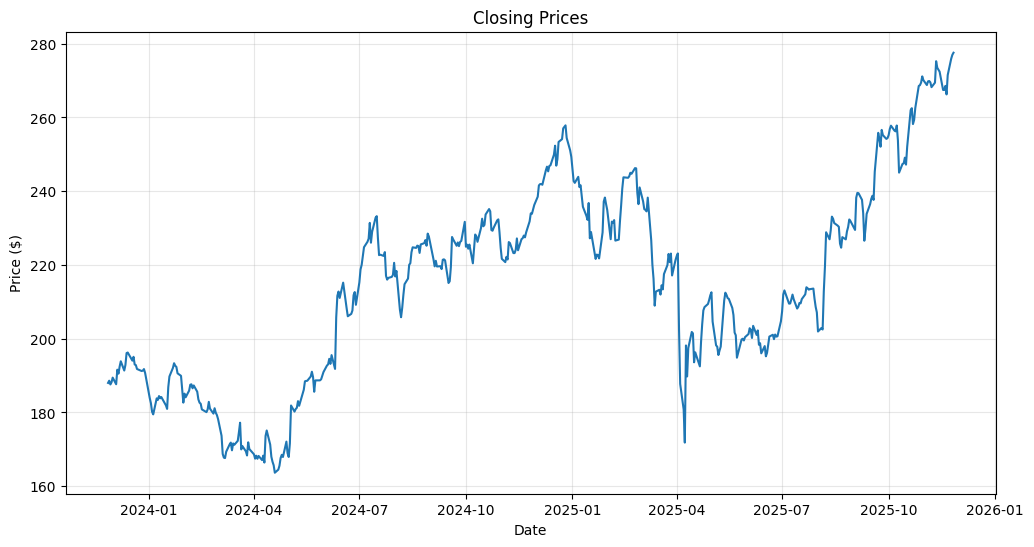

In [11]:
# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

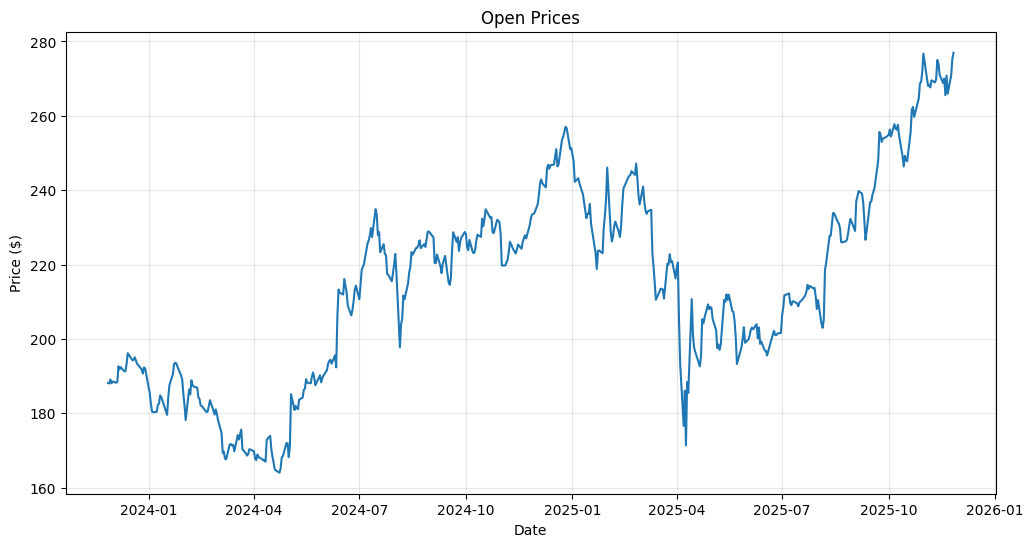

In [12]:
# Plot open prices
plt.figure(figsize=(12, 6))
plt.plot(data['Open'])
plt.title('Open Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

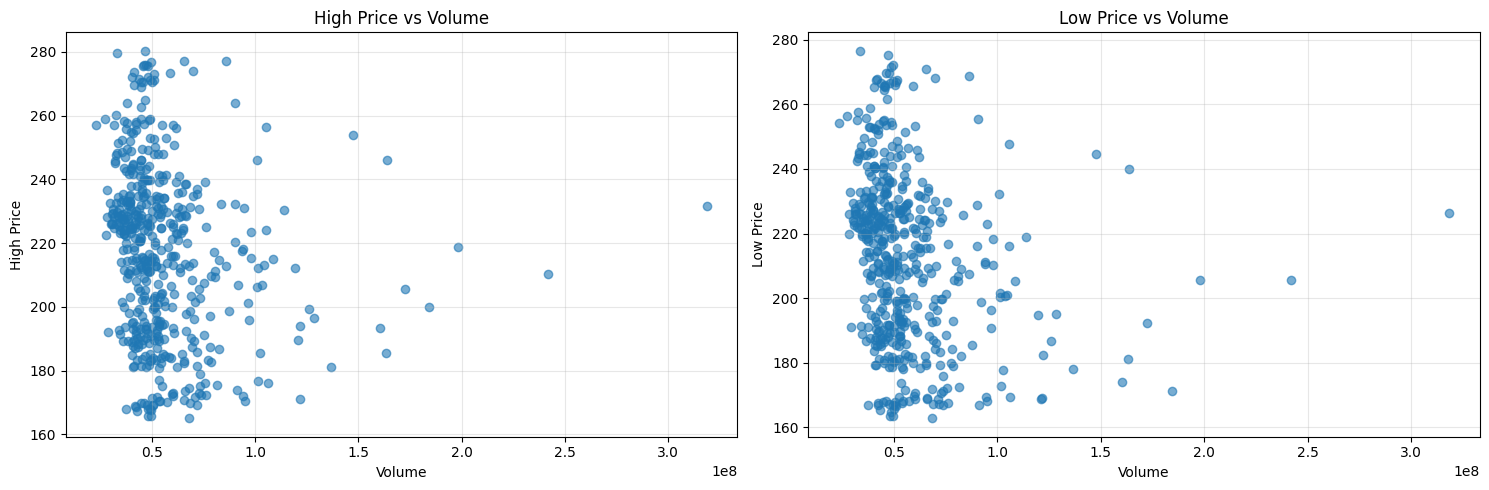

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(data['Volume'], data['High'], alpha=0.6)
ax1.set_title('High Price vs Volume')
ax1.set_xlabel('Volume')
ax1.set_ylabel('High Price')
ax1.grid(True, alpha=0.3)

ax2.scatter(data['Volume'], data['Low'], alpha=0.6)
ax2.set_title('Low Price vs Volume')
ax2.set_xlabel('Volume')
ax2.set_ylabel('Low Price')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

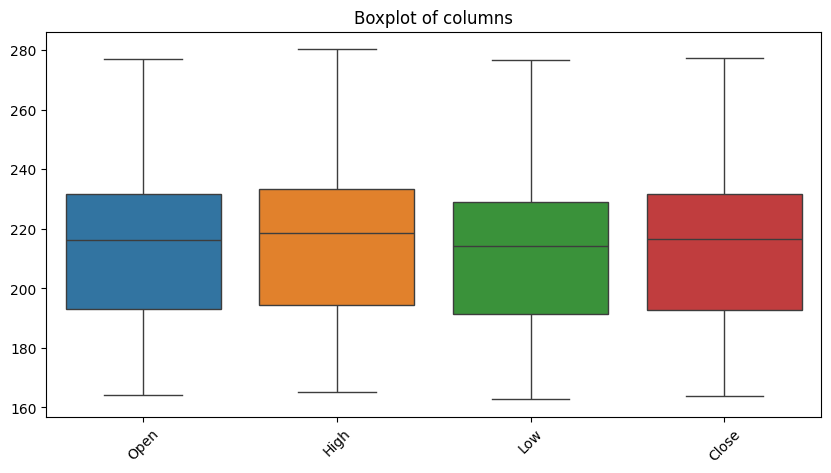

In [15]:
#boxplot of columns
plt.figure(figsize=(10,5))
data_boxplot = data[['Open', 'High', 'Low', 'Close']]
sns.boxplot(data=data_boxplot)
plt.xticks(rotation=45)
plt.title('Boxplot of columns')
plt.show()

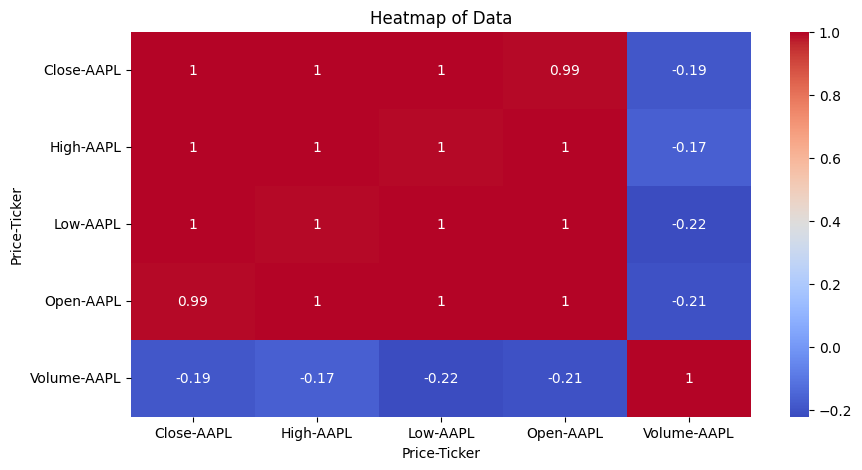

In [17]:
#heatmap
plt.figure(figsize=(10,5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Data')
plt.show()

**Feature Engineering**

In [18]:
df = data.copy()

df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['Price_Range'] = df['High'] - df['Low']
df['Price_Change'] = df['Close'] - df['Open']
df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()

In [19]:
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)

In [20]:
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

**Preparing Features**

In [24]:
features = ['Open', 'High', 'Low', 'Volume', 'Price_Range',
               'Price_Change', 'Volume_MA_5', 'MA5', 'MA10',
               'Prev_Close', 'Prev_Volume', 'Prev_High', 'Prev_Low']
X = df[features]
y = df["Target"]

print(f"Features prepared: {len(features)} features")
print(f"Training Samples: {len(X)}")
print(f"Feature Names: {features}")

Features prepared: 13 features
Training Samples: 493
Feature Names: ['Open', 'High', 'Low', 'Volume', 'Price_Range', 'Price_Change', 'Volume_MA_5', 'MA5', 'MA10', 'Prev_Close', 'Prev_Volume', 'Prev_High', 'Prev_Low']


**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


**Training Models**

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [27]:
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("MSE:", lr_mse)
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2: ", lr_r2)

MSE: 12.914324893100845
MAE: 2.480606171338542
RMSE: 3.593650635927322
R2:  0.9738325700998376


In [28]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2: ", r2)

MSE: 117.3052124146311
MAE: 7.582366633922886
RMSE: 10.830753086218479
R2:  0.7623123199863613


**Ploting Actual Vs Predicted Prices**

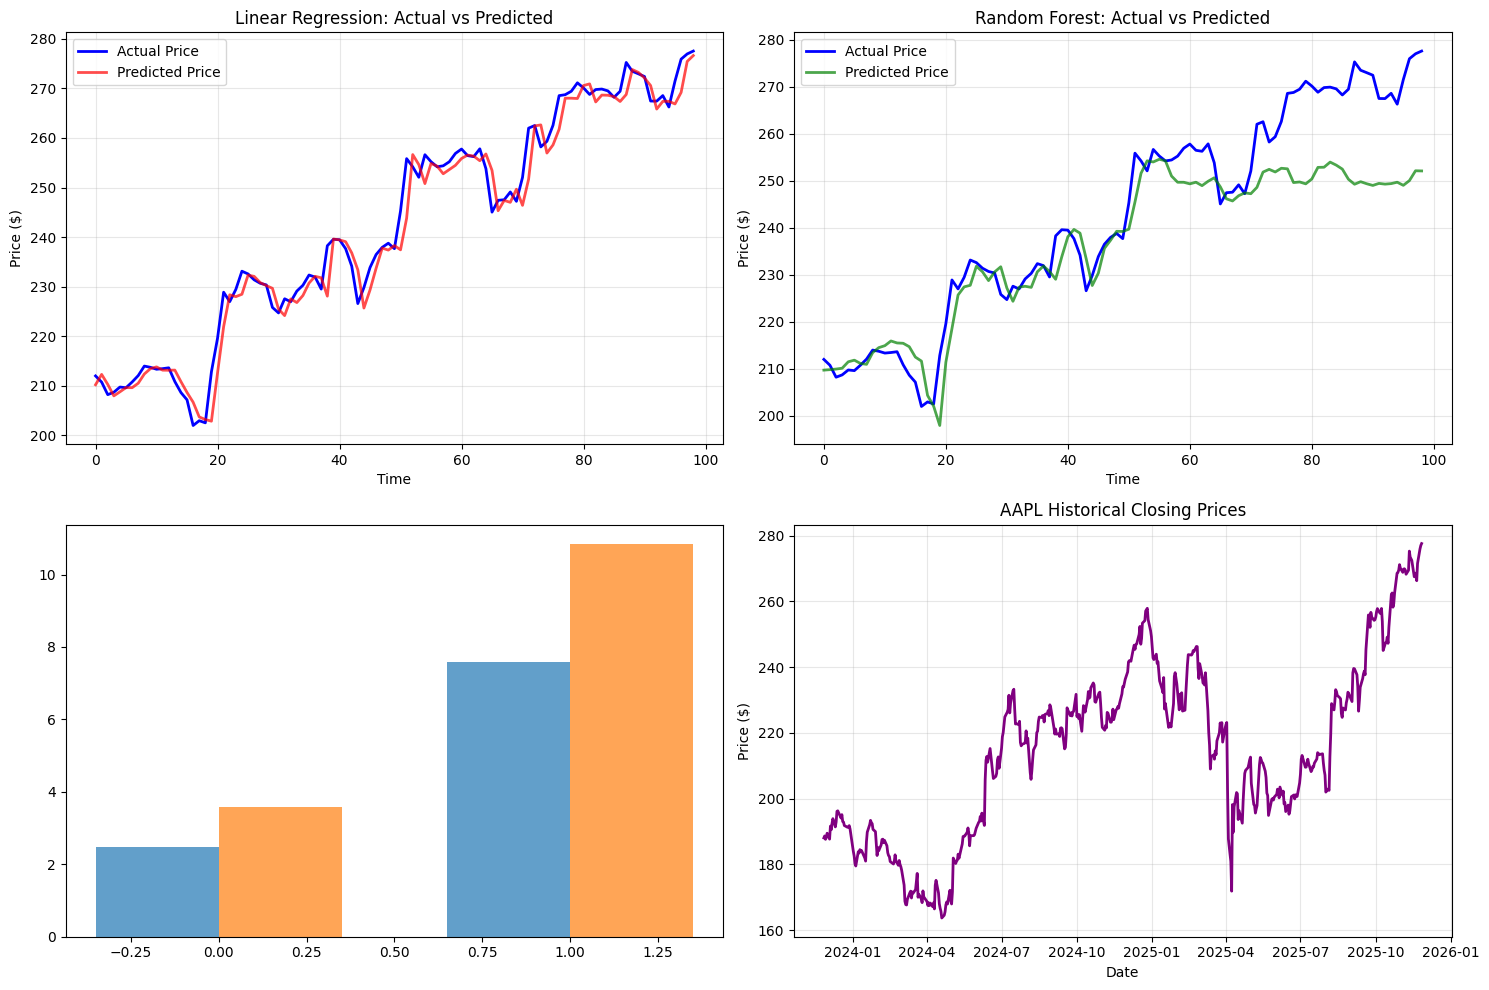

In [35]:
# Plot 1: Actual vs Predicted prices
plt.figure(figsize=(15, 10))

# Linear Regression plot
plt.subplot(2, 2, 1)
plt.plot(y_test.values, label='Actual Price', color='blue', linewidth=2)
plt.plot(lr_pred, label='Predicted Price', color='red', linewidth=2, alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Random Forest plot
plt.subplot(2, 2, 2)
plt.plot(y_test.values, label='Actual Price', color='blue', linewidth=2)
plt.plot(pred, label='Predicted Price', color='green', linewidth=2, alpha=0.7)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Error comparison
plt.subplot(2, 2, 3)
models = ['Linear Regression', 'Random Forest']
mae_scores = [lr_mae, mae]
rmse_scores = [lr_rmse, rmse]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, mae_scores, width, label='MAE', alpha=0.7)
plt.bar(x + width/2, rmse_scores, width, label='RMSE', alpha=0.7)

# Original closing prices
plt.subplot(2, 2, 4)
plt.plot(data['Close'], color='purple', linewidth=2)
plt.title('AAPL Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Predicting Next Day Prices**

In [38]:
# Get the latest data
latest_data = df.iloc[-1][features].values.reshape(1, -1)

# Make predictions
lr_next_pred = lr_model.predict(latest_data)[0]
rf_next_pred = rf_model.predict(latest_data)[0]
current_price = df['Close'].iloc[-1]

print(f"Current Closing Price: ${current_price.item():.2f}")
print(f"Linear Regression Next Day Prediction: ${lr_next_pred:.2f}")
print(f"Random Forest Next Day Prediction: ${rf_next_pred:.2f}")

# Calculate percentage changes
lr_change = ((lr_next_pred - current_price.item()) / current_price.item()) * 100
rf_change = ((rf_next_pred - current_price.item()) / current_price.item()) * 100

print(f"LR Predicted Change: {lr_change:.2f}%")
print(f"RF Predicted Change: {rf_change:.2f}%")

Current Closing Price: $276.97
Linear Regression Next Day Prediction: $276.64
Random Forest Next Day Prediction: $252.05
LR Predicted Change: -0.12%
RF Predicted Change: -9.00%


**Finding Best Model**

In [40]:
print(f"Best model: {'Random Forest' if rmse < lr_rmse else 'Linear Regression'}")
print(f"Best RMSE: ${min(lr_rmse, rmse):.2f}")
print(f"Dataset size: {len(data)} days")
print(f"Features used: {len(features)}")
print("Analysis complete!")

Best model: Linear Regression
Best RMSE: $3.59
Dataset size: 503 days
Features used: 13
Analysis complete!
